In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
from pyvis.network import Network 
import matplotlib.pyplot as plt
import random 
from numpy.linalg import norm
from matplotlib import pyplot as plt, colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#laod all the dataset 
Node = pd.read_csv('Node_info.csv')
Edge = pd.read_csv('Edge_info.csv')
dat2 = pd.read_csv('Song_attribute.csv')
artist = pd.read_csv("cleaned_artist.csv")
edweight = Edge['edge_weight'].tolist()
Edge.head()

,edge,edge_weight
0,"('Wale', 'Big Sean')",2.0
1,"('2 Chainz', 'Big Sean')",5.0
2,"('Rick Ross', 'Big Sean')",3.0
3,"('Young Money', 'Big Sean')",0.0
4,"('ScHoolboy Q', 'Big Sean')",0.0


In [3]:
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()

#have the edges:
Edges = []
Edge_weights = []
for index, rows in artist.iterrows():
    #make iterable 
    temp =(rows.artist, rows.related_to)
    #check if both nodes are inside the nodes list 
    if temp[0] in Nodes and temp[1] in Nodes:
      Edges.append(temp)
      Edge_weights.append(rows.collaborations)

In [4]:
#have a different edge set for interactive plot 
iEdges = []
for i in range(len(Edges)):
    temp = (Edges[i][0],Edges[i][1],edweight[i])
    iEdges.append(temp)

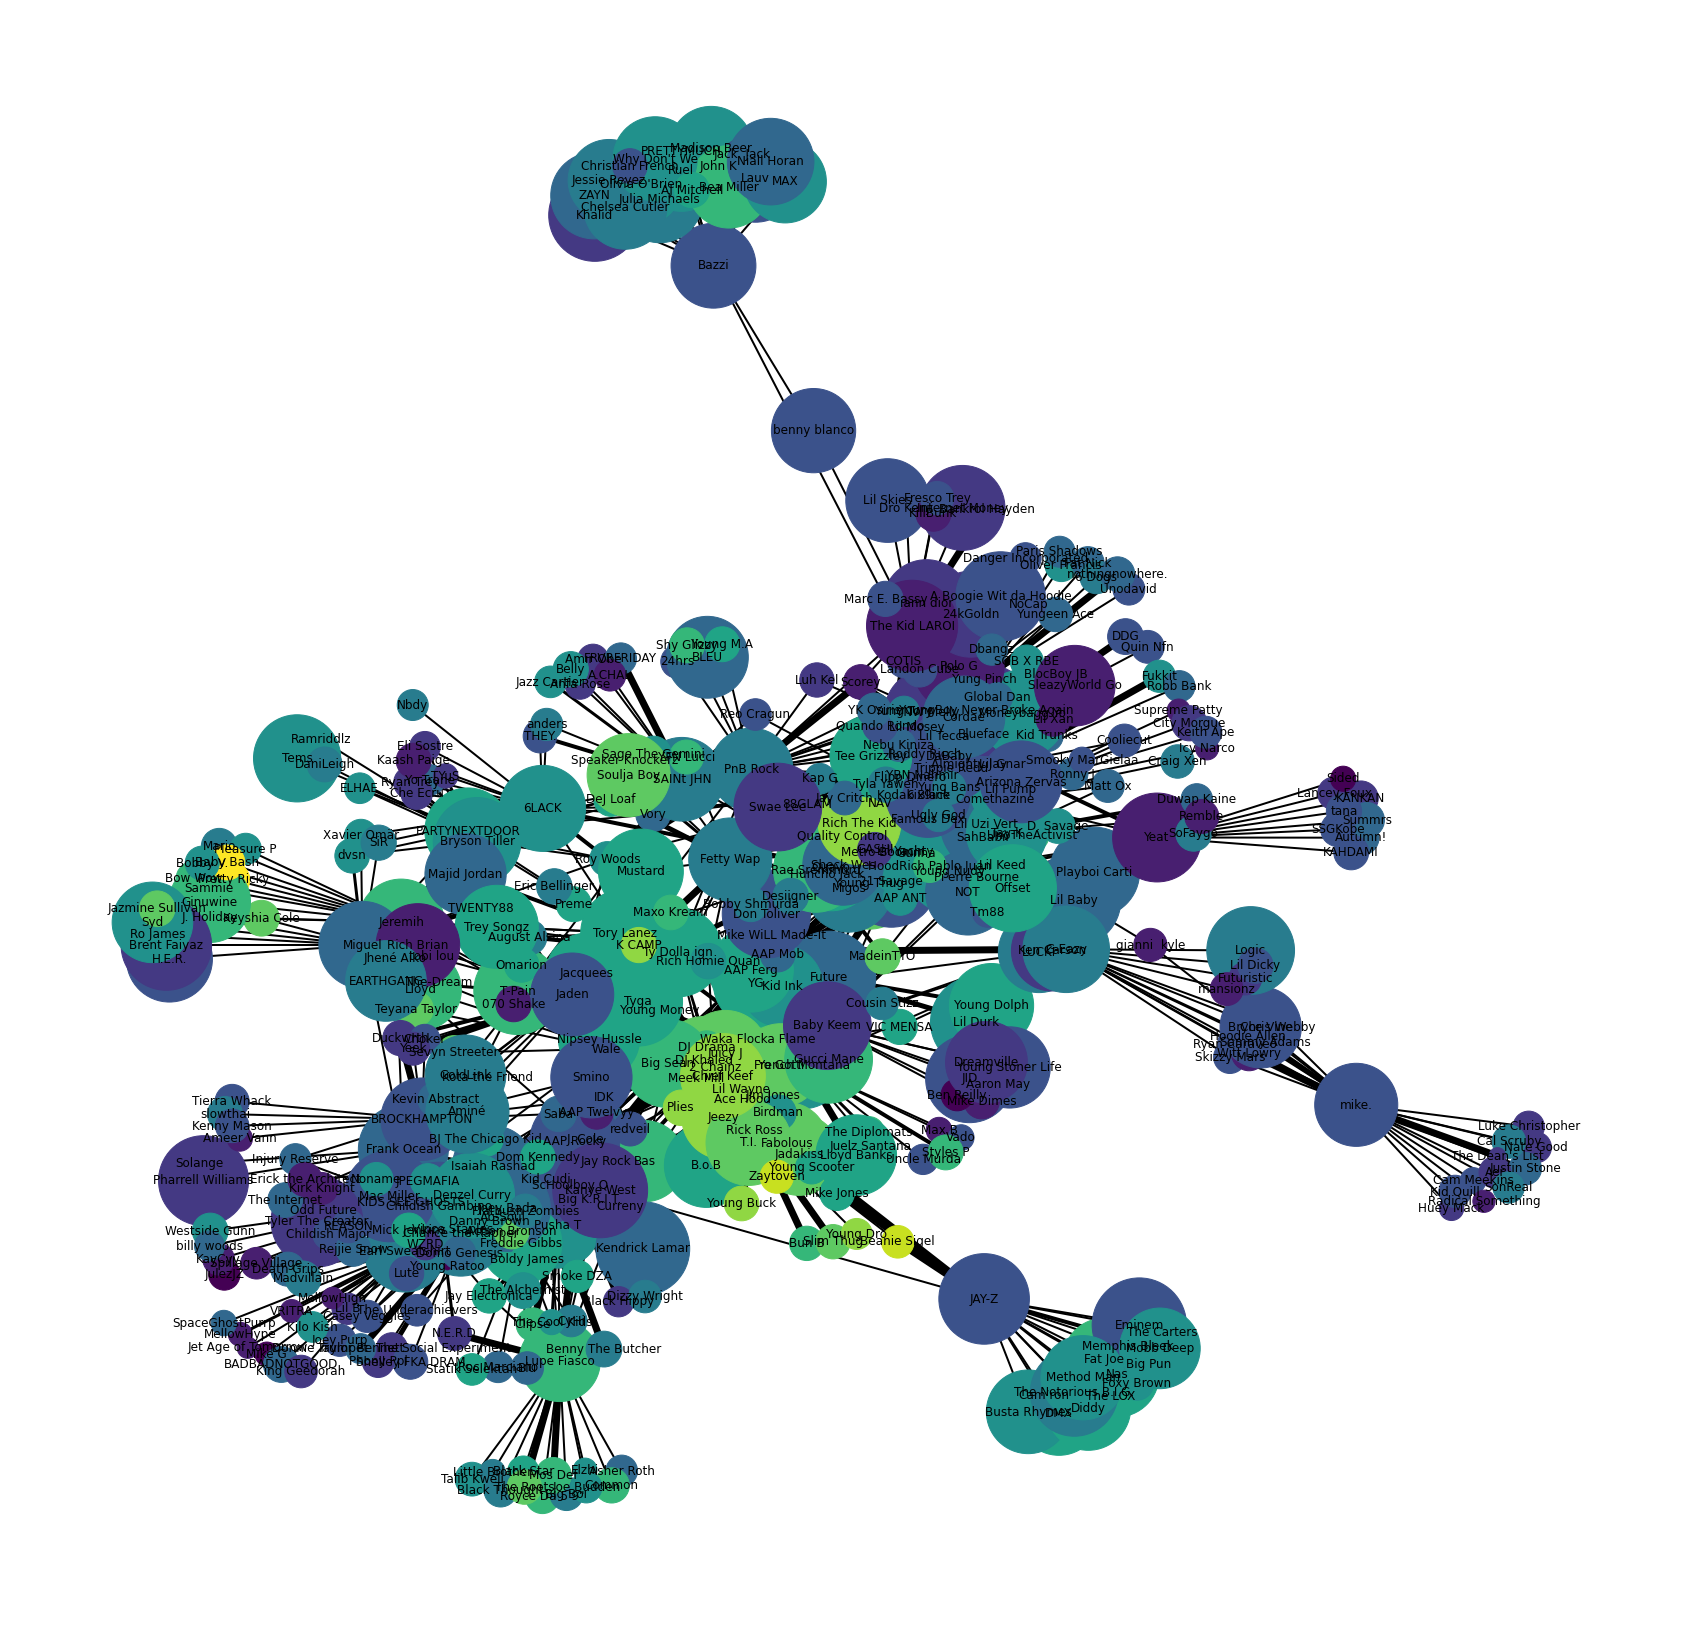

In [5]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
  Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
  for index, rows in dat2.iterrows():
    if rows.artist == key:
      Art[key][rows.song_name] = rows.song_info





#add node and weight
for i in range(len(Nodes)):
  G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
  if Edge_weights[i] == 0:
    Edge_weights[i] = 2
  elif Edge_weights[i] == 1:
    Edge_weights[i] = 3
  elif Edge_weights[i] == 2:
    Edge_weights[i] = 4
  elif Edge_weights[i] == 3:
    Edge_weights[i] = 5
  elif Edge_weights[i] > 3:
    Edge_weights[i] = 7

fig, ax = plt.subplots(figsize=(30,30))

nx.draw(G,with_labels=True,node_size = Node_size,node_color =Node_color,width = Edge_weights)

In [20]:
a = G.nodes['J. Cole']['songs']
a 

{'No Role Modelz': '[87.0, 0.69, 0.521, 10.0, -8.492, 0.0, 0.339, 0.324, 0.0, 0.0534, 0.494, 100.028, 292799.0]',
 'Wet Dreamz': '[83.0, 0.495, 0.722, 6.0, -8.108, 0.0, 0.357, 0.0697, 0.0, 0.113, 0.539, 175.627, 239267.0]',
 'She Knows feat. Amber Coffman  Cults': '[82.0, 0.766, 0.74, 1.0, -10.363, 1.0, 0.0807, 0.0193, 0.0784, 0.229, 0.183, 118.008, 296520.0]',
 'Work Out': '[81.0, 0.831, 0.427, 2.0, -6.903, 1.0, 0.106, 0.0531, 0.0, 0.307, 0.216, 93.004, 235320.0]',
 'MIDDLE CHILD': '[80.0, 0.837, 0.364, 8.0, -11.713, 1.0, 0.276, 0.149, 0.0, 0.271, 0.463, 123.984, 213594.0]',
 'p r i d e . i s . t h e . d e v i l with Lil Baby': '[79.0, 0.861, 0.656, 4.0, -7.867, 0.0, 0.425, 0.104, 0.0, 0.0986, 0.331, 88.967, 218210.0]',
 'm y . l i f e with 21 Savage  Morray': '[79.0, 0.597, 0.587, 7.0, -7.026, 0.0, 0.137, 0.0622, 0.0, 0.214, 0.0753, 140.021, 218802.0]',
 'Power Trip feat. Miguel': '[77.0, 0.667, 0.608, 1.0, -7.054, 1.0, 0.216, 0.324, 0.000198, 0.426, 0.475, 99.992, 241160.0]',
 'Unde

In [21]:
df = pd.read_csv('Merged_data.csv')
df = df.drop(['id', 'artist_id','related_to','collaborations','followers','genres_num','popularity'], axis=1)
df = df.drop_duplicates(keep='first')
df.head()

,artist,song_name,song_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,J. Cole,She Knows (feat. Amber Coffman & Cults),82.0,0.766,0.740,1.0,-10.363,1.0,0.0807,0.0193,0.078400,0.229,0.1830,118.008,296520.0
1,J. Cole,m y . l i f e (with 21 Savage & Morray),79.0,0.597,0.587,7.0,-7.026,0.0,0.1370,0.0622,0.000000,0.214,0.0753,140.021,218802.0
2,J. Cole,MIDDLE CHILD,80.0,0.837,0.364,8.0,-11.713,1.0,0.2760,0.1490,0.000000,0.271,0.4630,123.984,213594.0
3,J. Cole,a m a r i,75.0,0.725,0.713,4.0,-6.173,0.0,0.1870,0.1270,0.000000,0.617,0.2070,65.988,148421.0
4,J. Cole,Power Trip (feat. Miguel),77.0,0.667,0.608,1.0,-7.054,1.0,0.2160,0.3240,0.000198,0.426,0.4750,99.992,241160.0


In [22]:
df1 = pd.read_csv('Merged_data.csv')
df1 = df1.drop(['id', 'artist_id',], axis=1)

artists_score = df1[['artist','popularity','followers','genres_num']]
artists_score = artists_score.drop_duplicates(keep='first')
artists_score.head()

,artist,popularity,followers,genres_num
0,J. Cole,84.0,17438272.0,4.0
10,Meek Mill,75.0,6359883.0,6.0
20,DJ Khaled,76.0,7974759.0,9.0
30,Rick Ross,76.0,6101612.0,7.0
40,Wale,70.0,3728546.0,10.0


In [23]:
#save as a dictionary 
pop = {}
for index,rows in artists_score.iterrows():
    pop[rows.artist] = rows.followers

In [24]:
#implement functions here 
#pop is a dictionary records artists followers as above 
#df the dataframe have artists and songs infomration, as Merged_data.csv 
def recommend_songs_net(G,pop,df):
    #check if there are records about the artist
    art = input('Input an artist name: ')
    Nodes = list(G.nodes)
    if art not in Nodes:
        raise ValueError("Artist Not in Database")
                 
    #check num of neighbors 
    neigh = list(G.neighbors(art))
    #neigh.remove(art)
    #make neighbors abundant if less than 3
    if len(neigh) < 3:
                 
        #find the neighbors with highest followers amount 
        max_followers = pop[neigh[0]]
        tar_neighbor = neigh[0]
        for elem in neigh:
            if pop[elem] > max_followers:
                 max_followers = pop[elem]
                 tar_neighbor = elem 
                 
        #get neigbors from that neighbor  
        temp_neighbors = G.neighbors(tar_neighbor)
        for el in temp_neighbors:
            if el != tar_neighbor:
                neigh.append(el)
    
    #have the song with highest popularity of the input artist 
    artsongs = df.loc[df['artist'] == art]
                 
    #have songs from all the neighbors for clustering 
    neighborsongs = df.loc[df['artist'].isin(neigh)]
                 
    #have the most famous song of the input artist 
    artsongs = artsongs.sort_values('song_popularity', ascending=False)
    artsong = artsongs.head(1)
                 
    #at here I need it to be an array 
    compare_a = artsong.iloc[:,2:15]
    compare_a = compare_a.to_numpy()
                 
    #also save the neighbors songs as array
    data_a = neighborsongs.iloc[:,2:15]
    data_a = data_a.to_numpy()
                 
    #calulate cosine similarities and select top 10 songs from the neighbors songs 
    coss = []
    for arr in data_a:
        cos =  np.dot(compare_a,arr)/(norm(compare_a)*norm(arr))
        coss.append(cos)
    #add cosine similarities as a new column in neighbors songs 
    neighborsongs['similarity'] = coss
    neighborsongs = neighborsongs.sort_values('similarity', ascending=False)
    #have a new data frame to return 
    artistss = neighborsongs['artist'].tolist()
    songss = neighborsongs['song_name'].tolist()
    
    
    final = neighborsongs.head(10)
    final = final.iloc[:,[0,1]]
    final = final.reset_index()
    final = final.drop('index',axis = 1)
    
    return final

In [28]:
playli = recommend_songs_net(G,pop,df)

Input an artist name: J. Cole


C:\Users\jiyang\AppData\Local\Temp/ipykernel_25532/1900424744.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborsongs['similarity'] = coss


In [29]:
playli

,artist,song_name
0,Meek Mill,All Eyes on You (feat. Chris Brown & Nicki Minaj)
1,Nipsey Hussle,Racks in the Middle (feat. Roddy Ricch and Hit...
2,Wale,Lotus Flower Bomb (feat. Miguel)
3,Meek Mill,Dreams and Nightmares
4,Pusha T,Nosetalgia
5,Big Sean,Hate Our Love (with Big Sean)
6,Kanye West,Stronger
7,Joey Bada,The Highs & The Lows
8,Chance the Rapper,The Highs & The Lows
9,2 Chainz,It's A Vibe
